PYTHON -
PYTHON PANDAS - METHODS AND FUNCTIONS 

using dataframe.method


**DATA EXPLORATION**

In [14]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/FahadNAhmad/DATASETS/master/weather_data.csv')

In [15]:
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          9 non-null      object 
 1   temperature  5 non-null      float64
 2   windspeed    5 non-null      float64
 3   event        7 non-null      object 
dtypes: float64(2), object(2)
memory usage: 416.0+ bytes


In [17]:
df.set_index('day',inplace = True)

In [18]:
df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,NaN,9.0,Sunny
1/5/2017,28.0,NaN,Snow
1/6/2017,NaN,7.0,NaN
1/7/2017,32.0,NaN,Rain
1/8/2017,NaN,NaN,Sunny
1/9/2017,NaN,NaN,NaN
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [19]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,0.0,9.0,Sunny
1/5/2017,28.0,0.0,Snow
1/6/2017,0.0,7.0,0
1/7/2017,32.0,0.0,Rain
1/8/2017,0.0,0.0,Sunny
1/9/2017,0.0,0.0,0
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [20]:
#Use dictionary to fill specific values for a specific column
new_df = df.fillna({
          'temperature': 0,
          'windspeed':0,
          'event':'no event'
})
new_df

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,0.0,9.0,Sunny
1/5/2017,28.0,0.0,Snow
1/6/2017,0.0,7.0,no event
1/7/2017,32.0,0.0,Rain
1/8/2017,0.0,0.0,Sunny
1/9/2017,0.0,0.0,no event
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [21]:
new_df = df.fillna(method = "ffill")
new_df 

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,32.0,9.0,Sunny
1/5/2017,28.0,9.0,Snow
1/6/2017,28.0,7.0,Snow
1/7/2017,32.0,7.0,Rain
1/8/2017,32.0,7.0,Sunny
1/9/2017,32.0,7.0,Sunny
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [22]:
new_df = df.fillna(method = "bfill")
new_df 

,temperature,windspeed,event
day,,,
1/1/2017,32.0,6.0,Rain
1/4/2017,28.0,9.0,Sunny
1/5/2017,28.0,7.0,Snow
1/6/2017,32.0,7.0,Rain
1/7/2017,32.0,8.0,Rain
1/8/2017,34.0,8.0,Sunny
1/9/2017,34.0,8.0,Cloudy
1/10/2017,34.0,8.0,Cloudy
1/11/2017,40.0,12.0,Sunny


In [23]:
new_df = df.interpolate(method = "time")
new_df

ValueError: ignored

In [25]:
#Insert missing dates
dt = pd.data_range("01-01-2017","01-11-2017")
idx = pd.DatatimeIndex(dt)
df.reindex(idx, inplace = True)
df

AttributeError: ignored

In [26]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/FahadNAhmad/DATASETS/master/weather_by_cities.csv')

In [27]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [28]:
g = df.groupby('city')

In [30]:
#access each of groups
for city, city_df in g:
    print(city)
    print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [31]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [32]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [33]:
g.mean()

<ipython-input-33-c79523bc0c66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()


,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [34]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      Axes(0.125,0.11;0.775x0.77)
new york    Axes(0.125,0.11;0.775x0.77)
paris       Axes(0.125,0.11;0.775x0.77)
dtype: object

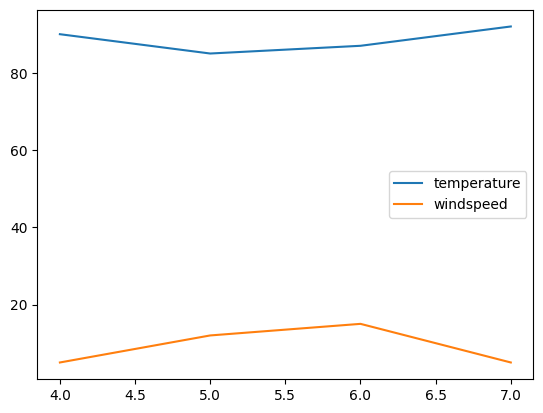

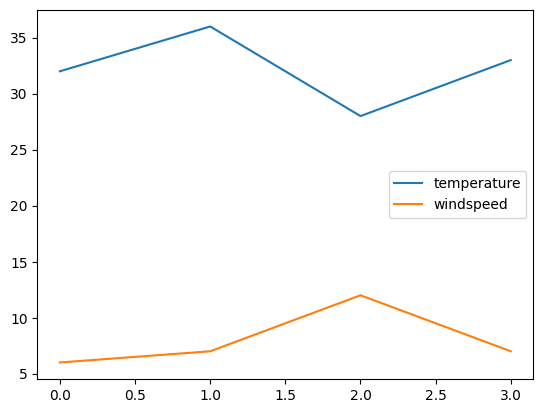

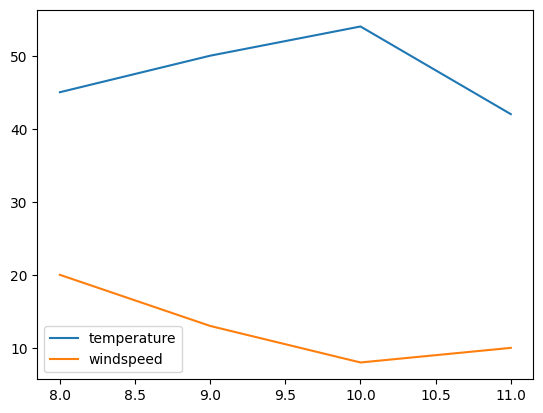

In [35]:
%matplotlib inline
g.plot()

**How do I use the "axis" parameter in pandas?**

In [16]:
import pandas as pd

drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [17]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [18]:
#Continent column was dropped
#axis 1 is the column
drinks.drop('continent', axis = 1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [19]:
#axis 0 is the row 
drinks.drop(2, axis = 0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [21]:
#Direction of operation is down
drinks.mean(axis = 0)

<ipython-input-21-4a672fa7eee6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  drinks.mean(axis = 0)


beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [22]:
#mean of each row
drinks.mean(axis = 1)

<ipython-input-22-43a6665a57ed>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis = 1)


0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

In [24]:
drinks.mean(axis='columns')

<ipython-input-24-6d8a9cb3720a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drinks.mean(axis='columns')


0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

**How to sort a pandas DataFrame or Series**

In [46]:
import pandas as pd

In [47]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [48]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [49]:
movies.title.sort_values()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
               ...          
955         Zero Dark Thirty
677                   Zodiac
615               Zombieland
526                     Zulu
864                    [Rec]
Name: title, Length: 979, dtype: object

In [51]:
movies['title'].sort_values(ascending = False)

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [52]:
movies.sort_values(['content_rating','duration'])

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
...,...,...,...,...,...,...
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


**Pandas index**

In [61]:
import pandas as pd

In [62]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [63]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [64]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [65]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [66]:
drinks[drinks.continent == 'South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [67]:
drinks.loc[23, 'beer_servings']

245

In [69]:
drinks.set_index('country', inplace = True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [70]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [71]:
drinks.reset_index(inplace = True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [72]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [73]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [77]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [78]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [79]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [80]:
drinks.set_index('country', inplace = True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [81]:
drinks.continent.head()

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [82]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [84]:
drinks.continent.value_counts()['Africa']

53

In [85]:
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [87]:
people = pd.Series([3000000, 85000], index = ['Albania', 'Andorra'], name = 'population')
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [89]:
drinks.beer_servings * people

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
                  ...     
Venezuela              NaN
Vietnam                NaN
Yemen                  NaN
Zambia                 NaN
Zimbabwe               NaN
Length: 193, dtype: float64

In [90]:
pd.concat([drinks,people],axis = 1).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


**HOW TO FILTER ROWS OF A PANDAS DATAFRAME BY COLUMN VALUE**

In [38]:
#How to filter rows of a pandas DataFrame by column value
import pandas as pd

movies = pd.read_csv('http://bit.ly/imdbratings')

In [39]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [41]:
movies.shape

(979, 6)

In [42]:
type(True)

bool

In [49]:
movies['duration']

0      142
1      175
2      200
3      152
4      154
      ... 
974    116
975    118
976    138
977    114
978    126
Name: duration, Length: 979, dtype: int64

In [52]:
booleans = []
for length in movies.duration:
    if length >= 200:
       booleans.append(True)
    else:
       booleans.append(False)

In [53]:
booleans[0:5]

[False, False, True, False, False]

In [55]:
len(booleans)

979

In [57]:
#Create a series
is_long = pd.Series(booleans)

In [58]:
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [59]:
#Shows column with durations larger than 200
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [60]:
is_long = movies.duration >= 200
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [51]:
df1

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [63]:
movies[movies.duration>=200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [64]:
movies[movies.duration>=200]['genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [65]:
#condition, and then pulling out a column
movies.loc[movies.duration>=200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

**How do I use string methods in pandas**

In [55]:
import pandas as pd

In [56]:
orders = pd.read_table('http://bit.ly/chiporders')

In [57]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [58]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [59]:
orders.item_name.str.contains('Chicken')

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [60]:
orders.choice_description.str.replace('[\[\]]','')

<ipython-input-60-34cbcd74ce54>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  orders.choice_description.str.replace('[\[\]]','')


0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

**How do I sort values**

In [14]:
movies.sort_values(['content_rating', 'duration'])

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."
...,...,...,...,...,...,...
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


**HOW DO I APPLY MULTIPLE FILTER CRITERIA TO A PANDAS DATAFRAME**

In [17]:
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')

In [18]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [4]:
True or False

True

In [6]:
True and True

True

In [8]:
movies[(movies.duration >= 200) | (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
...,...,...,...,...,...,...
958,7.4,My Sister's Keeper,PG-13,Drama,109,"[u'Cameron Diaz', u'Abigail Breslin', u'Alec B..."
968,7.4,The English Patient,R,Drama,162,"[u'Ralph Fiennes', u'Juliette Binoche', u'Will..."
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."


In [10]:
movies[movies.genre.isin(['Crime','Drama','Action'])]
movies[(movies.genre == 'Crime')| (movies.genre == 'Drama') | (movies.genre == 'Action')]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


**When should I use a "groupby" in pandas?**

In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [11]:
drinks[drinks.continent == 'Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [5]:
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [12]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [13]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [14]:
drinks.groupby('continent').mean()

<ipython-input-14-031c103ddf69>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


<Axes: xlabel='continent'>

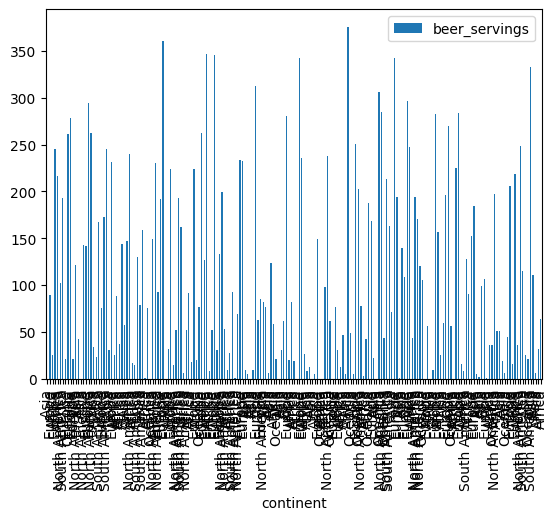

In [19]:
import matplotlib.pyplot as plt
drinks.plot(kind = 'bar', x = 'continent', y = 'beer_servings')

<ipython-input-25-be70ef3a8fbe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drinks.groupby('continent').mean().plot(kind='bar')


<Axes: xlabel='continent'>

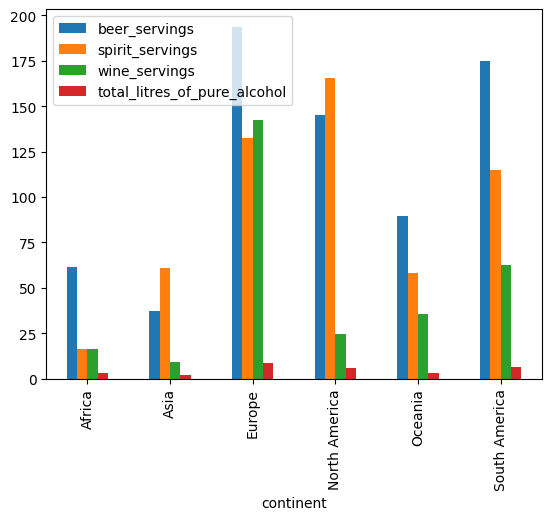

In [25]:
drinks.groupby('continent').mean().plot(kind='bar')

<Axes: xlabel='continent'>

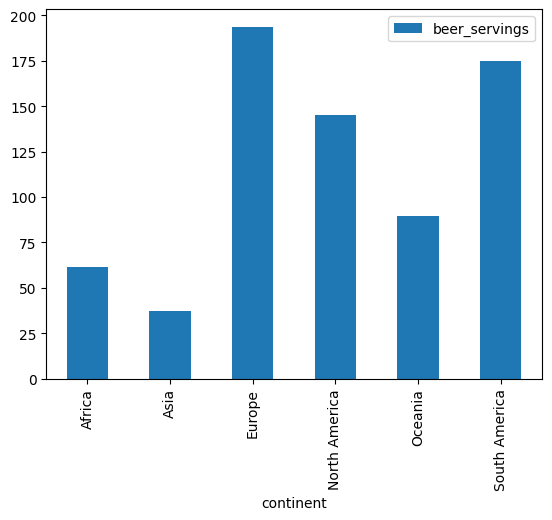

In [24]:
drinks.groupby('continent')[['beer_servings']].mean().plot(kind='bar')

In [ ]:
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')

In [ ]:
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()


plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
#x-value is the index-reservation status day
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

**Apply a function to a pandas Series or DataFrame**

In [26]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train['Sex_num']=train.Sex.map({'female':0, 'male':1})

In [29]:
#Want to see rows 1 to 4
train.loc[0:4, ['Sex','Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [31]:
train['Name_length']=train.Name.apply(len)

In [32]:
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [33]:
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [34]:
def get_element(my_list, position):
  return my_list[position]

In [35]:
#series of strings
train.Name.str.split(',').apply(get_element, position = 0)

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [37]:
#Lambda functions used with apply a lot
train.Name.str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [38]:
#Apply function down the row.
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [42]:
import pandas as pd
import numpy as np
#Gives maximum values
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis = 1)

0      0
1      1
2      0
3      2
4      0
      ..
188    0
189    0
190    0
191    0
192    0
Length: 193, dtype: int64

In [43]:
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0
...,...,...,...
188,333.0,100.0,3.0
189,111.0,2.0,1.0
190,6.0,0.0,0.0
191,32.0,19.0,4.0


In [44]:
drinks.loc[:, 'beer_servings':'wine_servings']

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45
...,...,...,...
188,333,100,3
189,111,2,1
190,6,0,0
191,32,19,4


In [45]:
drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head()

<ipython-input-45-eed09bc882ac>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
